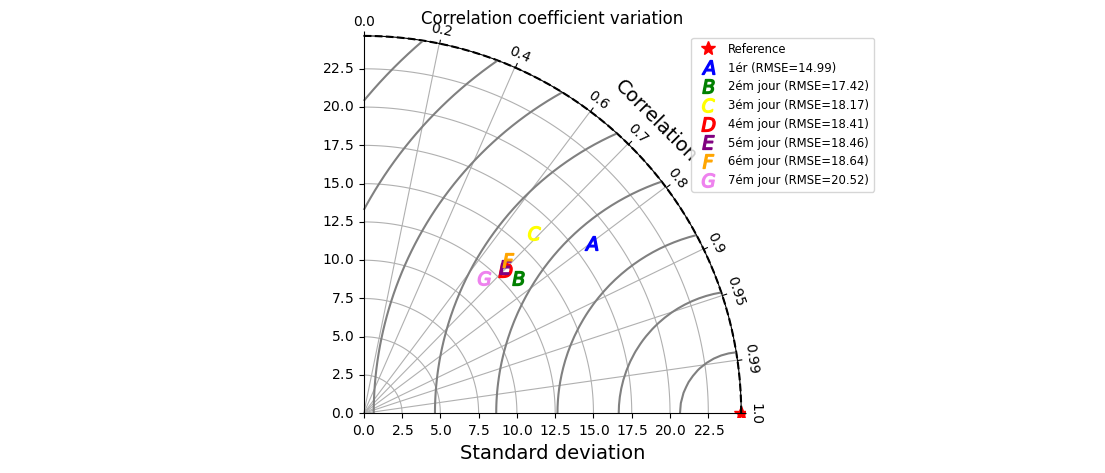

In [11]:
#!/usr/bin/env python
# Copyright: This document has been placed in the public domain.


__version__ = "Time-stamp: <2018-12-06 11:43:41 ycopin>"
__author__ = "Yannick Copin <yannick.copin@laposte.net>"

import numpy as NP
import numpy as np
import matplotlib.pyplot as PLT
import pandas as pd
import matplotlib.pyplot as plt
#from skill_metrics import TaylorDiagram


class TaylorDiagram(object):
    """
    Taylor diagram.

    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.

        Parameters:

        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")
        ax.axis["top"].label.set_fontsize(14) 

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")
        ax.axis["left"].label.set_fontsize(14)

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours



def test2():

    # data modele (3, 0, 1)
    df = pd.read_csv('predictions_et_obs.csv')  #2_1_1
    df1 = pd.read_csv('predictions_p_plus_one.csv')
    df2 = pd.read_csv('predictions_p_plus_two.csv')
    df3 = pd.read_csv('predictions_p_plus_three.csv')
    df4 = pd.read_csv('predictions_p_plus_four.csv')
    df5 = pd.read_csv('predictions_p_plus_five.csv')
    df6 = pd.read_csv('predictions_p_plus_six.csv')
    df7 = pd.read_csv('predictions_p_plus_seven.csv')

     # data modele (2, 1, 1)
    dfa = pd.read_csv('predictions_et_obs_2_1_1.csv')  #2_1_1
    df1a = pd.read_csv('predictions_p_plus_one_2_1_1.csv')
    df2a = pd.read_csv('predictions_p_plus_two_2_1.csv')
    df3a = pd.read_csv('predictions_p_plus_three_2_1_1.csv')
    df4a = pd.read_csv('predictions_p_plus_four_2_1_1.csv')
    df5a = pd.read_csv('predictions_p_plus_five_2_1_1.csv')
    df6a = pd.read_csv('predictions_p_plus_six_2_1_1.csv')
    df7a = pd.read_csv('predictions_p_plus_seven_2_1_1.csv')

# Extraire les colonnes d'observations réelles et de prédictions des modèles (3, 0, 1)
    valeurs_obsA = df['Observé'].values
    valeurs_predites_modele_A = df['Prédit'].values

    valeurs_obsB = df1['Observé (P + 1)'].values
    valeurs_predites_modele_B = df1['Prédit (P + 1)'].values

    valeurs_obsC = df2['Observé (P + 2)'].values
    valeurs_predites_modele_C = df2['Prédit (P + 2)'].values

    valeurs_obsD = df3['Observé (P + 3)'].values
    valeurs_predites_modele_D = df3['Prédit (P + 3)'].values

    valeurs_obsE = df4['Observé (P + 4)'].values
    valeurs_predites_modele_E = df4['Prédit (P + 4)'].values

    valeurs_obsF = df5['Observé (P + 5)'].values
    valeurs_predites_modele_F = df5['Prédit (P + 5)'].values

    valeurs_obsG = df6['Observé (P + 6)'].values
    valeurs_predites_modele_G = df6['Prédit (P + 6)'].values

    valeurs_obsH = df7['Observé (P + 7)'].values
    valeurs_predites_modele_H = df7['Prédit (P + 7)'].values

# Extraire les colonnes d'observations réelles et de prédictions des modèles (2, 1, 1)

    valeurs_obsAa = dfa['Observé'].values
    valeurs_predites_modele_Aa = dfa['Prédit'].values

    valeurs_obsBa = df1a['Observé (P + 1)'].values
    valeurs_predites_modele_Ba = df1a['Prédit (P + 1)'].values

    valeurs_obsCa = df2a['Observé (P + 2)'].values
    valeurs_predites_modele_Ca = df2a['Prédit (P + 2)'].values

    valeurs_obsDa = df3a['Observé (P + 3)'].values
    valeurs_predites_modele_Da = df3a['Prédit (P + 3)'].values

    valeurs_obsEa = df4a['Observé (P + 4)'].values
    valeurs_predites_modele_Ea = df4a['Prédit (P + 4)'].values

    valeurs_obsFa = df5a['Observé (P + 5)'].values
    valeurs_predites_modele_Fa = df5a['Prédit (P + 5)'].values

    valeurs_obsGa = df6a['Observé (P + 6)'].values
    valeurs_predites_modele_Ga = df6a['Prédit (P + 6)'].values

    valeurs_obsHa = df7a['Observé (P + 7)'].values
    valeurs_predites_modele_Ha = df7a['Prédit (P + 7)'].values
# ...
    fig = PLT.figure(figsize=(14, 5))
    #fig, axes = plt.plot(figsize=(14, 5))     # nrows=1,  #ncols=2,    subplots
# Créer un diagramme de Taylor
    refstd = np.std(valeurs_obsA)
    dia = TaylorDiagram(refstd, fig=fig,  label='Reference', extend=False)   #rect=121,
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

# RMSE modele (3, 0, 1)
    rmse_modele_A = np.sqrt(np.mean((valeurs_predites_modele_A - valeurs_obsA) ** 2))
    rmse_modele_B = np.sqrt(np.mean((valeurs_predites_modele_B - valeurs_obsB) ** 2))
    rmse_modele_C = np.sqrt(np.mean((valeurs_predites_modele_C - valeurs_obsC) ** 2))
    rmse_modele_D = np.sqrt(np.mean((valeurs_predites_modele_D - valeurs_obsD) ** 2))
    rmse_modele_E = np.sqrt(np.mean((valeurs_predites_modele_E - valeurs_obsE) ** 2))
    rmse_modele_F = np.sqrt(np.mean((valeurs_predites_modele_F - valeurs_obsF) ** 2))
    rmse_modele_G = np.sqrt(np.mean((valeurs_predites_modele_G - valeurs_obsG) ** 2))
    #rmse_modele_H = np.sqrt(np.mean((valeurs_predites_modele_H - valeurs_obsH) ** 2)) 

# Ajouter les échantillons (modèles) au diagramme modele(3, 0 , 1)
    dia.add_sample(np.std(valeurs_predites_modele_A), np.corrcoef(valeurs_obsA, valeurs_predites_modele_A)[0, 1], marker='$A$', ms=10, ls='', mfc='blue', mec='blue', label=f'1ér (RMSE={rmse_modele_A:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_B), np.corrcoef(valeurs_obsB, valeurs_predites_modele_B)[0, 1], marker='$B$', ms=10, ls='', mfc='green', mec='green', label=f'2ém jour (RMSE={rmse_modele_B:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_C), np.corrcoef(valeurs_obsC, valeurs_predites_modele_C)[0, 1], marker='$C$', ms=10, ls='', mfc='yellow', mec='yellow', label=f'3ém jour (RMSE={rmse_modele_C:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_D), np.corrcoef(valeurs_obsD, valeurs_predites_modele_D)[0, 1], marker='$D$', ms=10, ls='', mfc='red', mec='red', label=f'4ém jour (RMSE={rmse_modele_D:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_E), np.corrcoef(valeurs_obsE, valeurs_predites_modele_E)[0, 1], marker='$E$', ms=10, ls='', mfc='purple', mec='purple', label=f'5ém jour (RMSE={rmse_modele_E:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_F), np.corrcoef(valeurs_obsF, valeurs_predites_modele_F)[0, 1], marker='$F$', ms=10, ls='', mfc='orange', mec='orange', label=f'6ém jour (RMSE={rmse_modele_F:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_G), np.corrcoef(valeurs_obsG, valeurs_predites_modele_G)[0, 1], marker='$G$', ms=10, ls='', mfc='violet', mec='violet', label=f'7ém jour (RMSE={rmse_modele_G:.2f})')
    #dia.add_sample(np.std(valeurs_predites_modele_H), np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1], marker='$H$', ms=10, ls='', mfc='gray', mec='gray', label=f'8ém jour (RMSE={rmse_modele_H:.2f})')

# Ajouter des contours RMS et des grilles
    dia.add_contours(levels=10, colors='0.5')
    dia.add_grid()

# Configurer les axes et la légende
    dia._ax.axis[:].major_ticks.set_tick_out(True)
    plt.legend(dia.samplePoints, [p.get_label() for p in dia.samplePoints], numpoints=1, prop=dict(size='small'), loc='upper right', bbox_to_anchor=(1.35, 1))
    
# Ajouter un titre au diagramme
    plt.title('Correlation coefficient variation')

    #axes[0].set_axis_off()
   
    
    plt.show()
    return dia

if __name__ == '__main__':

    #dia = test1()
    dia = test2()

    #plt.savefig('diagramme_taylor.png')

    PLT.show()










In [ ]:
# fig = PLT.figure(figsize=(7, 5))

# Créer un diagramme de Taylor  
   ''' refstd = np.std(valeurs_obsAa)
    #dia = TaylorDiagram(refstd, fig=fig, rect=122, label='Reference', extend=False)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star


# RMSE modele (2, 1, 1)
    rmse_modele_Aa = np.sqrt(np.mean((valeurs_predites_modele_Aa - valeurs_obsAa) ** 2))
    rmse_modele_Ba = np.sqrt(np.mean((valeurs_predites_modele_Ba - valeurs_obsBa) ** 2))
    rmse_modele_Ca = np.sqrt(np.mean((valeurs_predites_modele_Ca - valeurs_obsCa) ** 2))
    rmse_modele_Da = np.sqrt(np.mean((valeurs_predites_modele_Da - valeurs_obsDa) ** 2))
    rmse_modele_Ea = np.sqrt(np.mean((valeurs_predites_modele_Ea - valeurs_obsEa) ** 2))
    rmse_modele_Fa = np.sqrt(np.mean((valeurs_predites_modele_Fa - valeurs_obsFa) ** 2))
    rmse_modele_Ga = np.sqrt(np.mean((valeurs_predites_modele_Ga - valeurs_obsGa) ** 2))
    #rmse_modele_H = np.sqrt(np.mean((valeurs_predites_modele_H - valeurs_obsH) ** 2)) 


# Ajouter les échantillons (modèles) au diagramme modele (2, 1, 1)
    dia.add_sample(np.std(valeurs_predites_modele_Aa), np.corrcoef(valeurs_obsAa, valeurs_predites_modele_Aa)[0, 1], marker='$A$', ms=10, ls='', mfc='blue', mec='blue', label=f'1ér (RMSE={rmse_modele_Aa:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Ba), np.corrcoef(valeurs_obsBa, valeurs_predites_modele_Ba)[0, 1], marker='$B$', ms=10, ls='', mfc='green', mec='green', label=f'2ém jour (RMSE={rmse_modele_Ba:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Ca), np.corrcoef(valeurs_obsCa, valeurs_predites_modele_Ca)[0, 1], marker='$C$', ms=10, ls='', mfc='yellow', mec='yellow', label=f'3ém jour (RMSE={rmse_modele_Ca:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Da), np.corrcoef(valeurs_obsDa, valeurs_predites_modele_Da)[0, 1], marker='$D$', ms=10, ls='', mfc='red', mec='red', label=f'4ém jour (RMSE={rmse_modele_Da:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Ea), np.corrcoef(valeurs_obsEa, valeurs_predites_modele_Ea)[0, 1], marker='$E$', ms=10, ls='', mfc='purple', mec='purple', label=f'5ém jour (RMSE={rmse_modele_Ea:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Fa), np.corrcoef(valeurs_obsFa, valeurs_predites_modele_Fa)[0, 1], marker='$F$', ms=10, ls='', mfc='orange', mec='orange', label=f'6ém jour (RMSE={rmse_modele_Fa:.2f})')
    dia.add_sample(np.std(valeurs_predites_modele_Ga), np.corrcoef(valeurs_obsGa, valeurs_predites_modele_Ga)[0, 1], marker='$G$', ms=10, ls='', mfc='violet', mec='violet', label=f'7ém jour (RMSE={rmse_modele_Ga:.2f})')
    #dia.add_sample(np.std(valeurs_predites_modele_H), np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1], marker='$H$', ms=10, ls='', mfc='gray', mec='gray', label=f'8ém jour (RMSE={rmse_modele_H:.2f})')

# ...

# Ajouter des contours RMS et des grilles
    dia.add_contours(levels=10, colors='0.5')
    dia.add_grid()

# Configurer les axes et la légende
    dia._ax.axis[:].major_ticks.set_tick_out(True)
    plt.legend(dia.samplePoints, [p.get_label() for p in dia.samplePoints], numpoints=1, prop=dict(size='small'), loc='upper right', bbox_to_anchor=(1.45, 1))
    
# Ajouter un titre au diagramme
    #plt.title('Correlation coefficient variation')

    #plt.savefig('diagramme_taylor_final_fr.png')

    axes[1].set_axis_off()'''

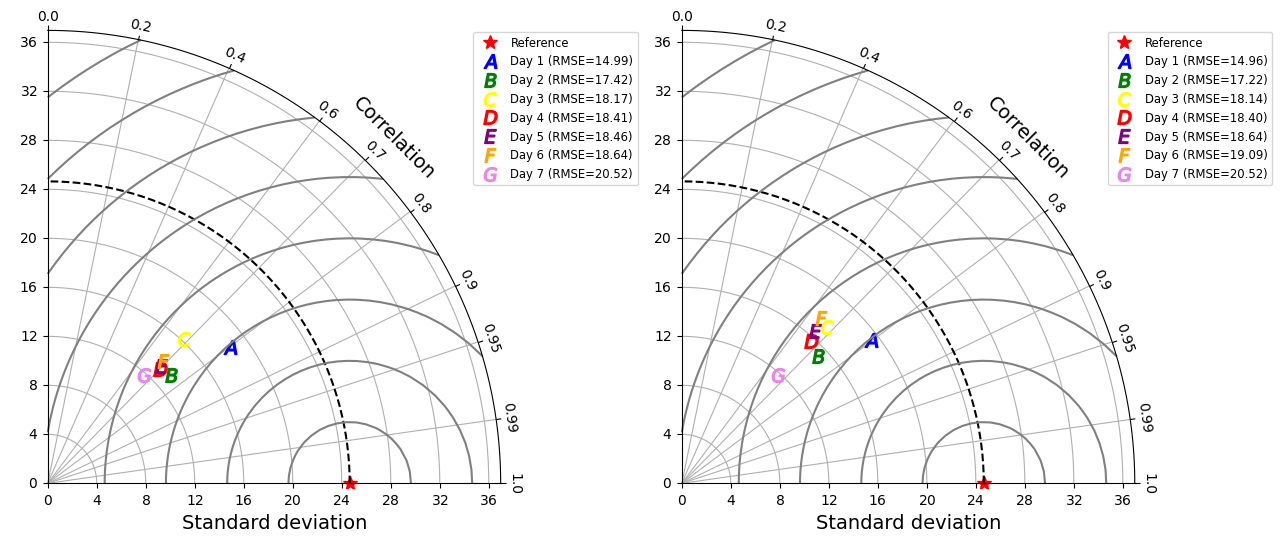

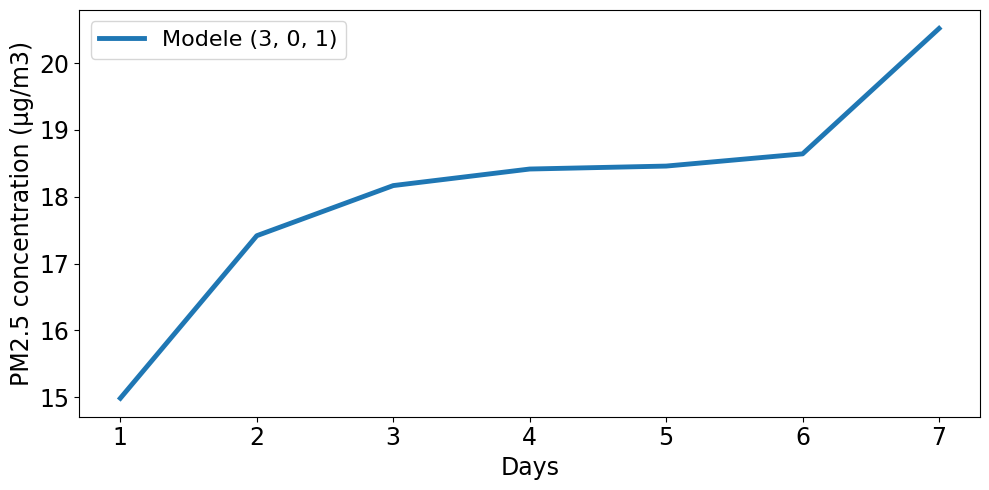

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class TaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='_', srange=(0, 1.5), extend=False):
        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd

        tr = PolarAxes.PolarTransform()

        rlocs = np.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            self.tmax = np.pi
            rlocs = np.concatenate((-rlocs[:0:-1], rlocs))
        else:
            self.tmax = np.pi / 2
        tlocs = np.arccos(rlocs)
        gl1 = GF.FixedLocator(tlocs)
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        ax.axis["top"].set_axis_direction("bottom")
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")
        ax.axis["top"].label.set_fontsize(14)

        ax.axis["left"].set_axis_direction("bottom")
        ax.axis["left"].label.set_text("Standard deviation")
        ax.axis["left"].label.set_fontsize(14)

        ax.axis["right"].set_axis_direction("top")
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)

        self._ax = ax
        self.ax = ax.get_aux_axes(tr)

        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = np.linspace(0, self.tmax)
        r = np.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        l, = self.ax.plot(np.arccos(corrcoef), stddev,
                          *args, **kwargs)
        self.samplePoints.append(l)
        return l

    def add_grid(self, *args, **kwargs):
        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax),
                             np.linspace(0, self.tmax))
        rms = np.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*np.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours


def test2():
    df = pd.read_csv('predictions_et_obs.csv')
    df1 = pd.read_csv('predictions_p_plus_one.csv')
    #df1 = pd.read_csv('predictions_p_plus_one.csv')
    df2 = pd.read_csv('predictions_p_plus_two.csv')
    df3 = pd.read_csv('predictions_p_plus_three.csv')
    df4 = pd.read_csv('predictions_p_plus_four.csv')
    df5 = pd.read_csv('predictions_p_plus_five.csv')
    df6 = pd.read_csv('predictions_p_plus_six.csv')
    df7 = pd.read_csv('predictions_p_plus_seven.csv')

     # data modele (2, 1, 1)
    dfa = pd.read_csv('predictions_et_obs_2_1_1.csv')  #2_1_1
    df1a = pd.read_csv('predictions_p_plus_one_2_1_1.csv')
    df2a = pd.read_csv('predictions_p_plus_two_2_1.csv')
    df3a = pd.read_csv('predictions_p_plus_three_2_1_1.csv')
    df4a = pd.read_csv('predictions_p_plus_four_2_1_1.csv')
    df5a = pd.read_csv('predictions_p_plus_five_2_1_1.csv')
    df6a = pd.read_csv('predictions_p_plus_six_2_1_1.csv')
    df7a = pd.read_csv('predictions_p_plus_seven_2_1_1.csv')

    # ... (Continuer de lire les autres fichiers et extraire les données)
# Extraire les colonnes d'observations réelles et de prédictions des modèles (3, 0, 1)
    valeurs_obsA = df['Observé'].values
    valeurs_predites_modele_A = df['Prédit'].values

    valeurs_obsB = df1['Observé (P + 1)'].values
    valeurs_predites_modele_B = df1['Prédit (P + 1)'].values

    valeurs_obsC = df2['Observé (P + 2)'].values
    valeurs_predites_modele_C = df2['Prédit (P + 2)'].values

    valeurs_obsD = df3['Observé (P + 3)'].values
    valeurs_predites_modele_D = df3['Prédit (P + 3)'].values

    valeurs_obsE = df4['Observé (P + 4)'].values
    valeurs_predites_modele_E = df4['Prédit (P + 4)'].values

    valeurs_obsF = df5['Observé (P + 5)'].values
    valeurs_predites_modele_F = df5['Prédit (P + 5)'].values

    valeurs_obsG = df6['Observé (P + 6)'].values
    valeurs_predites_modele_G = df6['Prédit (P + 6)'].values

    valeurs_obsH = df7['Observé (P + 7)'].values
    valeurs_predites_modele_H = df7['Prédit (P + 7)'].values

# Extraire les colonnes d'observations réelles et de prédictions des modèles (2, 1, 1)

    valeurs_obsAa = dfa['Observé'].values
    valeurs_predites_modele_Aa = dfa['Prédit'].values

    valeurs_obsBa = df1a['Observé (P + 1)'].values
    valeurs_predites_modele_Ba = df1a['Prédit (P + 1)'].values

    valeurs_obsCa = df2a['Observé (P + 2)'].values
    valeurs_predites_modele_Ca = df2a['Prédit (P + 2)'].values

    valeurs_obsDa = df3a['Observé (P + 3)'].values
    valeurs_predites_modele_Da = df3a['Prédit (P + 3)'].values

    valeurs_obsEa = df4a['Observé (P + 4)'].values
    valeurs_predites_modele_Ea = df4a['Prédit (P + 4)'].values

    valeurs_obsFa = df5a['Observé (P + 5)'].values
    valeurs_predites_modele_Fa = df5a['Prédit (P + 5)'].values

    valeurs_obsGa = df6a['Observé (P + 6)'].values
    valeurs_predites_modele_Ga = df6a['Prédit (P + 6)'].values

    valeurs_obsHa = df7a['Observé (P + 7)'].values
    valeurs_predites_modele_Ha = df7a['Prédit (P + 7)'].values

    # Créer une seule figure avec deux sous-graphiques
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Créer le premier diagramme de Taylor
    refstd = np.std(valeurs_obsA)
    dia1 = TaylorDiagram(refstd, fig=fig, rect=121, label='Reference', extend=False)
    dia1.samplePoints[0].set_color('r')

    # RMSE modele (3, 0, 1)
    rmse_modele_A = np.sqrt(np.mean((valeurs_predites_modele_A - valeurs_obsA) ** 2))
    rmse_modele_B = np.sqrt(np.mean((valeurs_predites_modele_B - valeurs_obsB) ** 2))
    rmse_modele_C = np.sqrt(np.mean((valeurs_predites_modele_C - valeurs_obsC) ** 2))
    rmse_modele_D = np.sqrt(np.mean((valeurs_predites_modele_D - valeurs_obsD) ** 2))
    rmse_modele_E = np.sqrt(np.mean((valeurs_predites_modele_E - valeurs_obsE) ** 2))
    rmse_modele_F = np.sqrt(np.mean((valeurs_predites_modele_F - valeurs_obsF) ** 2))
    rmse_modele_G = np.sqrt(np.mean((valeurs_predites_modele_G - valeurs_obsG) ** 2))
    #rmse_modele_H = np.sqrt(np.mean((valeurs_predites_modele_H - valeurs_obsH) ** 2))
    
    # Ajouter des échantillons (modèles) au premier diagramme
    dia1.add_sample(np.std(valeurs_predites_modele_A), np.corrcoef(valeurs_obsA, valeurs_predites_modele_A)[0, 1], marker='$A$', ms=10, ls='', mfc='blue', mec='blue', label=f'Day 1 (RMSE={rmse_modele_A:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_B), np.corrcoef(valeurs_obsB, valeurs_predites_modele_B)[0, 1], marker='$B$', ms=10, ls='', mfc='green', mec='green', label=f'Day 2 (RMSE={rmse_modele_B:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_C), np.corrcoef(valeurs_obsC, valeurs_predites_modele_C)[0, 1], marker='$C$', ms=10, ls='', mfc='yellow', mec='yellow', label=f'Day 3 (RMSE={rmse_modele_C:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_D), np.corrcoef(valeurs_obsD, valeurs_predites_modele_D)[0, 1], marker='$D$', ms=10, ls='', mfc='red', mec='red', label=f'Day 4 (RMSE={rmse_modele_D:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_E), np.corrcoef(valeurs_obsE, valeurs_predites_modele_E)[0, 1], marker='$E$', ms=10, ls='', mfc='purple', mec='purple', label=f'Day 5 (RMSE={rmse_modele_E:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_F), np.corrcoef(valeurs_obsF, valeurs_predites_modele_F)[0, 1], marker='$F$', ms=10, ls='', mfc='orange', mec='orange', label=f'Day 6 (RMSE={rmse_modele_F:.2f})')
    dia1.add_sample(np.std(valeurs_predites_modele_G), np.corrcoef(valeurs_obsG, valeurs_predites_modele_G)[0, 1], marker='$G$', ms=10, ls='', mfc='violet', mec='violet', label=f'Day 7 (RMSE={rmse_modele_G:.2f})')
    #dia.add_sample(np.std(valeurs_predites_modele_H), np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1], marker='$H$', ms=10, ls='', mfc='gray', mec='gray', label=f'8ém jour (RMSE={rmse_modele_H:.2f})')


    # Ajouter des contours RMS et des grilles au premier diagramme
    dia1.add_contours(levels=10, colors='0.5')
    dia1.add_grid()

    # Configurer les axes et la légende pour le premier diagramme
    dia1._ax.axis[:].major_ticks.set_tick_out(True)
    plt.legend(dia1.samplePoints, [p.get_label() for p in dia1.samplePoints], numpoints=1, prop=dict(size='small'), loc='upper right', bbox_to_anchor=(1.30, 1))
   # plt.title('Correlation coefficient variation: Modele(3, 0, 1)')

    # Supprimer les axes du premier sous-graphique
    axes[0].set_axis_off()

    
    # Créer le deuxième diagramme de Taylor
    refstd = np.std(valeurs_obsAa)
    dia2 = TaylorDiagram(refstd, fig=fig, rect=122, label='Reference', extend=False)
    dia2.samplePoints[0].set_color('r')

    # RMSE modele (2, 1, 1)
    rmse_modele_Aa = np.sqrt(np.mean((valeurs_predites_modele_Aa - valeurs_obsAa) ** 2))
    rmse_modele_Ba = np.sqrt(np.mean((valeurs_predites_modele_Ba - valeurs_obsBa) ** 2))
    rmse_modele_Ca = np.sqrt(np.mean((valeurs_predites_modele_Ca - valeurs_obsCa) ** 2))
    rmse_modele_Da = np.sqrt(np.mean((valeurs_predites_modele_Da - valeurs_obsDa) ** 2))
    rmse_modele_Ea = np.sqrt(np.mean((valeurs_predites_modele_Ea - valeurs_obsEa) ** 2))
    rmse_modele_Fa = np.sqrt(np.mean((valeurs_predites_modele_Fa - valeurs_obsFa) ** 2))
    rmse_modele_Ga = np.sqrt(np.mean((valeurs_predites_modele_Ga - valeurs_obsGa) ** 2))
    #rmse_modele_H = np.sqrt(np.mean((valeurs_predites_modele_H - valeurs_obsH) ** 2)) 

    # Ajouter des échantillons (modèles) au deuxième diagramme
    dia2.add_sample(np.std(valeurs_predites_modele_Aa), np.corrcoef(valeurs_obsAa, valeurs_predites_modele_Aa)[0, 1], marker='$A$', ms=10, ls='', mfc='blue', mec='blue', label=f'Day 1 (RMSE={rmse_modele_Aa:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Ba), np.corrcoef(valeurs_obsBa, valeurs_predites_modele_Ba)[0, 1], marker='$B$', ms=10, ls='', mfc='green', mec='green', label=f'Day 2 (RMSE={rmse_modele_Ba:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Ca), np.corrcoef(valeurs_obsCa, valeurs_predites_modele_Ca)[0, 1], marker='$C$', ms=10, ls='', mfc='yellow', mec='yellow', label=f'Day 3 (RMSE={rmse_modele_Ca:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Da), np.corrcoef(valeurs_obsDa, valeurs_predites_modele_Da)[0, 1], marker='$D$', ms=10, ls='', mfc='red', mec='red', label=f'Day 4 (RMSE={rmse_modele_Da:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Ea), np.corrcoef(valeurs_obsEa, valeurs_predites_modele_Ea)[0, 1], marker='$E$', ms=10, ls='', mfc='purple', mec='purple', label=f'Day 5 (RMSE={rmse_modele_Ea:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Fa), np.corrcoef(valeurs_obsFa, valeurs_predites_modele_Fa)[0, 1], marker='$F$', ms=10, ls='', mfc='orange', mec='orange', label=f'Day 6 (RMSE={rmse_modele_Fa:.2f})')
    dia2.add_sample(np.std(valeurs_predites_modele_Ga), np.corrcoef(valeurs_obsGa, valeurs_predites_modele_Ga)[0, 1], marker='$G$', ms=10, ls='', mfc='violet', mec='violet', label=f'Day 7 (RMSE={rmse_modele_Ga:.2f})')
    #dia.add_sample(np.std(valeurs_predites_modele_H), np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1], marker='$H$', ms=10, ls='', mfc='gray', mec='gray', label=f'8ém jour (RMSE={rmse_modele_H:.2f})')


    # Ajouter des contours RMS et des grilles au deuxième diagramme
    dia2.add_contours(levels=10, colors='0.5')
    dia2.add_grid()

    # Configurer les axes et la légende pour le deuxième diagramme
    dia2._ax.axis[:].major_ticks.set_tick_out(True)
    plt.legend(dia2.samplePoints, [p.get_label() for p in dia2.samplePoints], numpoints=1, prop=dict(size='small'), loc='upper right', bbox_to_anchor=(1.30, 1))
   # plt.title('Correlation coefficient variation : Modele(2, 1, 1)')

    # Supprimer les axes du deuxième sous-graphique
    axes[1].set_axis_off()
    #plt.savefig('diagrammes_taylor_22_f1.png', dpi=300)
    plt.savefig('figure.png', bbox_inches='tight', dpi=300)
    #plt.figure(figsize=(10, 5))

    plt.figure(figsize=(10, 5))

# Tracer les valeurs RMSE dans le troisième sous-graphique
    jours = np.array([1, 2, 3, 4, 5, 6, 7])  # Numéros de jour
    rmse = np.array([rmse_modele_A, rmse_modele_B, rmse_modele_C, rmse_modele_D, rmse_modele_E, rmse_modele_F, rmse_modele_G])
    #rmsea = np.array([rmse_modele_Aa, rmse_modele_Ba, rmse_modele_Ca, rmse_modele_Da, rmse_modele_Ea, rmse_modele_Fa, rmse_modele_Ga])

    plt.plot(jours, rmse, label='Modele (3, 0, 1)', linewidth=3.5,)
    #plt.plot(jours, rmsea, label='Modele (2, 1, 1)', linewidth=3.5,)
    plt.xlabel('Days', fontsize=17)
    plt.tick_params(axis='both', which='both', labelsize=17)


    plt.ylabel('PM2.5 concentration (µg/m3)', fontsize=17) #RMSE (Root Mean Square Error)
    #plt.title('RMSE variation by day', fontsize=17)
    plt.legend(fontsize=16)
    plt.savefig('courbe MRSE_final_seule.png', bbox_inches='tight', dpi=300)

#coefficient de correlation
   
    

    # Ajuster l'espace entre les deux sous-graphiques'''
    plt.tight_layout()
    # Afficher et sauvegarder la figure
    plt.savefig('Coefficient correlation_final_seule', dpi=300)
    plt.show()


if __name__ == '__main__':
    test2()
    plt.show()
    


In [ ]:
''' plt.figure(figsize=(10, 5))
# Plot correlation coefficients
    jours = np.array([1, 2, 3, 4, 5, 6, 7])  # Replace with actual days

    correlation_coefficients = [
       np.corrcoef(valeurs_obsA, valeurs_predites_modele_A)[0, 1],
       np.corrcoef(valeurs_obsB, valeurs_predites_modele_B)[0, 1],
       np.corrcoef(valeurs_obsC, valeurs_predites_modele_C)[0, 1],
       np.corrcoef(valeurs_obsD, valeurs_predites_modele_D)[0, 1],
       np.corrcoef(valeurs_obsE, valeurs_predites_modele_E)[0, 1],
       np.corrcoef(valeurs_obsF, valeurs_predites_modele_F)[0, 1],
       np.corrcoef(valeurs_obsG, valeurs_predites_modele_G)[0, 1]
       #np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1]
       ]'''
    '''correlation_coefficientsa = [
       np.corrcoef(valeurs_obsAa, valeurs_predites_modele_Aa)[0, 1],
       np.corrcoef(valeurs_obsBa, valeurs_predites_modele_Ba)[0, 1],
       np.corrcoef(valeurs_obsCa, valeurs_predites_modele_Ca)[0, 1],
       np.corrcoef(valeurs_obsDa, valeurs_predites_modele_Da)[0, 1],
       np.corrcoef(valeurs_obsEa, valeurs_predites_modele_Ea)[0, 1],
       np.corrcoef(valeurs_obsFa, valeurs_predites_modele_Fa)[0, 1],
       np.corrcoef(valeurs_obsGa, valeurs_predites_modele_Ga)[0, 1]
       #np.corrcoef(valeurs_obsH, valeurs_predites_modele_H)[0, 1]
       ]'''
    
    '''plt.plot(jours, correlation_coefficients, marker='o', linestyle='-', color='o', label='Modele ARIMA (3, 0, 1)', linewidth=3.5)
   # plt.plot(jours, correlation_coefficientsa, marker='o', linestyle='-', color='r', label='Modele ARIMA (2, 1, 1)', linewidth=3.5)
    plt.xlabel('Days', fontsize=17)
    plt.ylabel('Correlation coefficient (R²)', fontsize=17)
    plt.tick_params(axis='both', which='both', labelsize=18)
    #plt.title('Variation des Coefficients de Corrélation en fonction des jours')
    plt.legend(fontsize=17)'''